,temperatura,tiempos,FA,FB,T0,conductividad
0,25.6,0,40,40,25.6,0.00663
1,25.6,3,40,40,25.6,0.00656
2,25.6,6,40,40,25.6,0.00680
3,25.6,9,40,40,25.6,0.00693
4,25.6,12,40,40,25.6,0.00693
5,25.6,15,40,40,25.6,0.00695
6,25.6,18,40,40,25.6,0.00698


,temperatura,tiempos,FA,FB,T0,conductividad
0,25.6,23,50,50,25.6,0.00651
1,25.6,25,50,50,25.6,0.00662
2,25.6,27,50,50,25.6,0.00690
3,25.6,29,50,50,25.6,0.00705
4,25.6,31,50,50,25.6,0.00710
5,25.6,33,50,50,25.6,0.00733


,temperatura,T0,FA,FB,tiempos,conductividad
0,25.6,25.6,60,60,38,0.00719
1,25.6,25.6,60,60,40,0.00732
2,25.6,25.6,60,60,42,0.00794
3,25.6,25.6,60,60,44,0.00794
4,25.6,25.6,60,60,46,0.00797


,"Tiempo, min",conductividad,Caudal,at,ct,xa,xe
0,0,0.006630,40.0,0.020044,0.029956,0.599118,0.599118
1,3,0.006560,40.0,0.019516,0.030484,0.609676,0.609676
2,6,0.006800,40.0,0.021326,0.028674,0.573477,0.573477
3,9,0.006930,40.0,0.022307,0.027693,0.553869,0.553869
4,12,0.006930,40.0,0.022307,0.027693,0.553869,0.553869
5,15,0.006950,40.0,0.022457,0.027543,0.550852,0.550852
6,18,0.006980,40.0,0.022684,0.027316,0.546327,0.546327
7,Media,0.006826,NaN,0.021520,0.028480,0.569598,0.569598


,"Tiempo, min",conductividad,Caudal,at,ct,xa,xe
0,23,0.006510,50.0,0.019139,0.030861,0.617217,0.617217
1,25,0.006620,50.0,0.019969,0.030031,0.600626,0.600626
2,27,0.006900,50.0,0.022080,0.027920,0.558394,0.558394
3,29,0.007050,50.0,0.023212,0.026788,0.535769,0.535769
4,31,0.007100,50.0,0.023589,0.026411,0.528228,0.528228
5,33,0.007330,50.0,0.025323,0.024677,0.493537,0.493537
6,Media,0.006918,NaN,0.022219,0.027781,0.555628,0.555628


,"Tiempo, min",conductividad,Caudal,at,ct,xa,xe
0,38,0.007190,60.0,0.024267,0.025733,0.514653,0.514653
1,40,0.007320,60.0,0.025248,0.024752,0.495045,0.495045
2,42,0.007940,60.0,0.029923,0.020077,0.401531,0.401531
3,44,0.007940,60.0,0.029923,0.020077,0.401531,0.401531
4,46,0.007970,60.0,0.030150,0.019850,0.397006,0.397006
5,Media,0.007672,NaN,0.027902,0.022098,0.441953,0.441953


,"Caudal, ml/min","TRS, s",xa,xa/(1-xa)
0,40,300.0,0.569598,1.323410
1,50,240.0,0.555628,1.250369
2,60,200.0,0.441953,0.791965


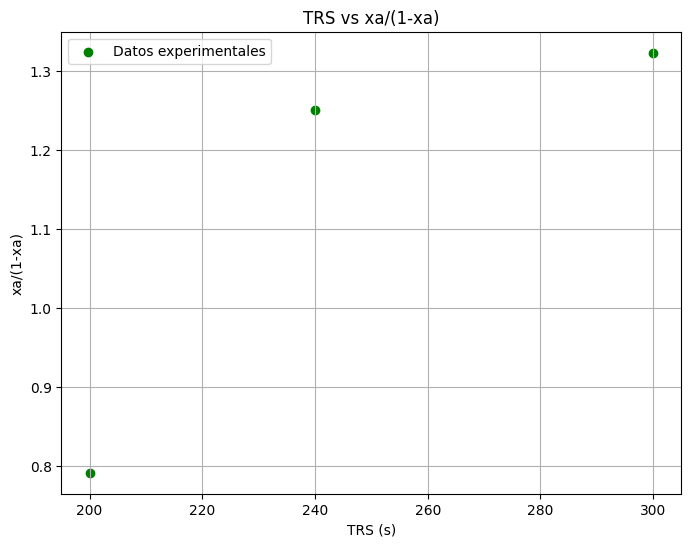

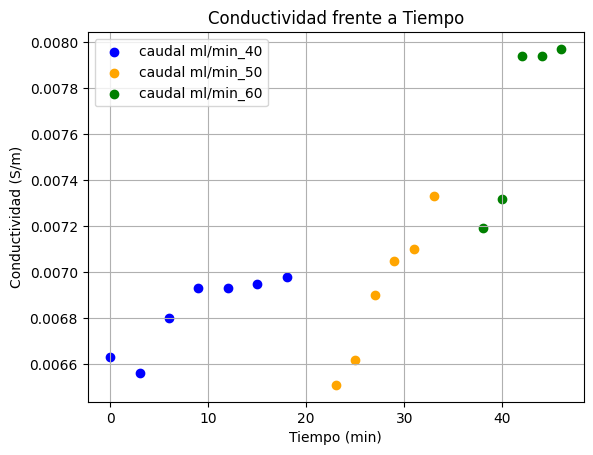

,pendiente,ordenada,k
0,0.004991,0.896552,0.09982


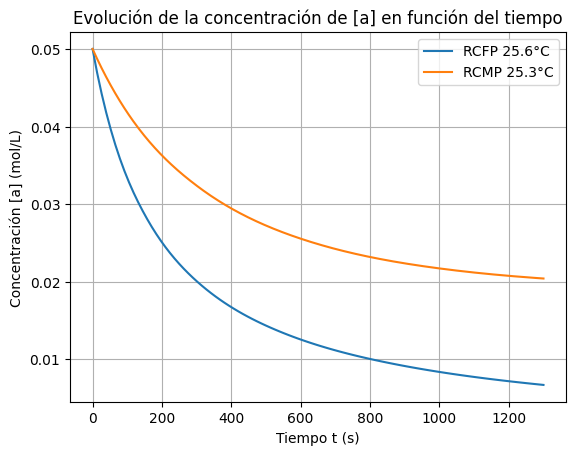

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import linregress
from scipy.integrate import solve_ivp
import pickle
Caudal_objetivo = [40, 50, 60]

Au = 0.1
bu = 0.1    
c0 = 0.0
V = 0.4  # Volumen del reactor en litros

medidas = [
    {'temperatura': [25.6, 25.6, 25.6, 25.6,25.6,25.6,25.6],
     'tiempos' : [0, 3, 6, 9, 12, 15,18],
     'FA': [40]*7,
     'FB': [40]*7,
     'T0': 25.6,
     'conductividad': [6.63/1000, 6.56/1000, 6.80/1000, 6.93/1000, 6.93/1000, 6.95/1000,6.98/1000]},

    {'temperatura': [25.6, 25.6, 25.6, 25.6, 25.6,25.6],
     'tiempos' : [23, 25, 27, 29, 31,33],
     'FA': [50]*6,
     'FB': [50]*6,
     'T0' : 25.6,
     'conductividad': [6.51/1000, 6.62/1000, 6.90/1000, 7.05/1000,  7.10/1000, 7.33/1000]},

    {'temperatura': [25.6,25.6 , 25.6, 25.6, 25.6],
     'T0' : np.mean([25.6,25.6 , 25.6, 25.6, 25.6]),
     'FA': [60]*5,
     'FB': [60]*5,
     'tiempos' : [38, 40, 42, 44, 46],
     'conductividad': [7.19/1000, 7.32/1000, 7.940/1000, 7.94/1000, 7.97/1000]},
]

dataframes_medidas = {}
for i, medida in enumerate(medidas):
    df = pd.DataFrame(medida)
    # Asignar un nombre específico al DataFrame basado en la temperatura objetivo
    nombre_df = f"caudal ml/min_{Caudal_objetivo[i]}"
    dataframes_medidas[nombre_df] = df
    display(dataframes_medidas[nombre_df])

plt.figure(figsize=(8, 6))
colores = ['blue', 'orange', 'green']

div = []
TRS = []
div_list = []
TRS_list = []
xa_list = []
Fa_list = []
# Usar enumerate para acceder al índice y las medidas
for i, medida in enumerate(medidas):
    Fa = medida['FA'][0]
    Fb = medida['FB'][0]
    a0 = (Fa / (Fa + Fb)) * Au
    b0 = (Fb / (Fa + Fb)) * bu
    T0 = medida['T0']+273.15

    if b0 < a0:
        cinf = b0 
    else:
        cinf = a0

    alpha_c_inf = 0.07 * (1 + 0.0284 * (T0 - 294)) * cinf
    alpha_a0 = 0.195 * (1 + 0.0184 * (T0 - 294)) * a0

    if c0 == 0:
        Alpha0 = alpha_a0 

    ainf = a0 - b0 if a0 >= b0 else 0
    alpha_a_inf = 0.195 * (1 + 0.0184 * (T0 - 294)) * ainf if ainf != 0 else 0
    alpha_inf = alpha_c_inf + alpha_a_inf

    
    C = medida['conductividad']
    T = medida['tiempos']

    at = []
    ct = []
    xa = []
    xe = []



    for c,t in zip(C, T):
        at_val = (ainf - a0) * ((Alpha0 - c) / (Alpha0 - alpha_inf)) + a0
        ct_val = cinf * ((Alpha0 - c) / (Alpha0 - alpha_inf))
        xa_val = (a0 - at_val) / a0
        xe_val = ct_val / cinf
        
        # Almacenar los resultados
        at.append(at_val)
        ct.append(ct_val)
        xa.append(xa_val)
        xe.append(xe_val)
    
    # Crear un DataFrame con los resultados del bucle
    df_result = pd.DataFrame({
        'Tiempo, min': T,
        'conductividad': C,
        'Caudal': [Fa] * len(T),  # Adjusted to match the length of T
        'at': at,
        'ct': ct,
        'xa': xa,
        'xe': xe
    })
    # Calcular la media de las columnas
    media_at = df_result['at'].mean()
    media_ct = df_result['ct'].mean()
    media_xa = df_result['xa'].mean()
    media_xe = df_result['xe'].mean()
    media_Tiempo = df_result['Tiempo, min'].mean()
    media_conductividad = df_result['conductividad'].mean()

    # Agregar fila de medias al final del DataFrame
    df_media = pd.DataFrame({
        'Tiempo, min': ['Media'],
        'conductividad': [media_conductividad],  # Ningún valor para la columna de conductividad
        'at': [media_at],
        'ct': [media_ct],
        'xa': [media_xa],
        'xe': [media_xe]
    })
    # Concatenar la fila de medias al DataFrame original

    df_result = pd.concat([df_result, df_media], ignore_index=True)
    display(df_result)
    valor_media_xa = df_result['xa'].iloc[-1]
    div = valor_media_xa/(1-valor_media_xa)
    TRS = V/((Fa+Fb)/60000) # para pasar de ml/min a L/s 
    div_list.append(div)
    TRS_list.append(TRS)
    xa_list.append(valor_media_xa)
    Fa_list.append(Fa)
df_retencion = pd.DataFrame({
    'Caudal, ml/min': Fa_list,
    'TRS, s': TRS_list,
    'xa': xa_list,
    'xa/(1-xa)': div_list
})
display(df_retencion)
plt.scatter(TRS_list, div_list, marker='o', label='Datos experimentales', color=colores[i])
plt.xlabel('TRS (s)')
plt.ylabel('xa/(1-xa)')
plt.title('TRS vs xa/(1-xa)')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica Conductividad vs Tiempo
for i, (nombre, df) in enumerate(dataframes_medidas.items()):
    plt.scatter(df['tiempos'], df['conductividad'], label=nombre, color=colores[i])

plt.xlabel('Tiempo (min)')
plt.ylabel('Conductividad (S/m)')
plt.title('Conductividad frente a Tiempo')
plt.legend()
plt.grid(True)
plt.show()

# Dataframe valores de K 


slope, intercept, r_value, _, std_err = linregress(TRS_list,div_list)

pendiente = slope 
ordenada = np.exp(intercept)
k = pendiente/a0
df_k = pd.DataFrame({
    'pendiente': [pendiente],
    'ordenada': [ordenada],
    'k': [k]
})
display(df_k)

# perfil de concentracion
t_max = 1300.0 # Tiempo máximo de simulación (en s)

def odes(t, a):
    return -k * a**2

# Intervalo de integración y condición inicial
t_span = (0, t_max)   # desde t=0 hasta t=t_max
a_initial = [a0]      # concentración inicial

# Resolución de la ODE
sol = solve_ivp(odes, t_span, a_initial, method='RK45', dense_output=True)

# Evaluación de la solución y gráfica
t_eval = np.linspace(0, t_max, 100)  # puntos para evaluar la solución
a_eval = sol.sol(t_eval)             # valores de [a] en el tiempo
with open('datos_serie_1.pkl', 'rb') as f:
    t_serie_1, a_t_serie_1 = pickle.load(f)
# Gráfica
plt.plot(t_eval, a_eval[0], label='RCFP 25.6°C')
plt.plot(t_serie_1, a_t_serie_1, label='RCMP 25.3°C')
plt.xlabel('Tiempo t (s)')
plt.ylabel('Concentración [a] (mol/L)')
plt.title('Evolución de la concentración de [a] en función del tiempo')
plt.legend()
plt.grid()
plt.show()



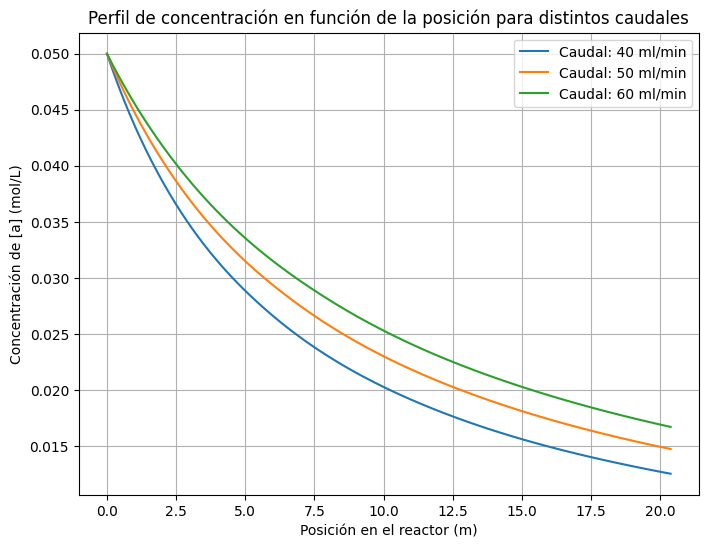

In [60]:

diametro = 5/1000   # Diámetro del tubo (m)

# Cálculo del área de la sección transversal y velocidad de flujo
A_reactor = np.pi * (diametro / 2)**2  # Área de la sección transversal (m^2)
# Resolver la concentración a lo largo de la posición x en el reactor
def odes_pos(x, a, v):
    return -k / v * a**2

# Calcular la concentración para cada caudal
posiciones = np.linspace(0, 20.37, 100)  # Longitud del reactor en metros
soluciones_posicion = {}

for medida in medidas:
    caudal = medida['FA'][0]  # Caudal de cada serie (ml/min)
    caudal_m3_s = caudal / 60000000  # Convertir caudal a m³/s
    v = caudal_m3_s / A_reactor  # Velocidad en el reactor (m/s)

    # Resolver la EDO para cada caudal a lo largo de la posición x
    sol_pos = solve_ivp(odes_pos, (posiciones[0], posiciones[-1]), [a0], args=(v,), t_eval=posiciones, method='RK45')
    soluciones_posicion[caudal] = sol_pos.y[0]  # Guardar la concentración en función de x para este caudal

# Graficar resultados
plt.figure(figsize=(8, 6))
for caudal, a_conc in soluciones_posicion.items():
    plt.plot(posiciones, a_conc, label=f'Caudal: {caudal} ml/min')
plt.xlabel('Posición en el reactor (m)')
plt.ylabel('Concentración de [a] (mol/L)')
plt.title('Perfil de concentración en función de la posición para distintos caudales')
plt.legend()
plt.grid()
plt.show()

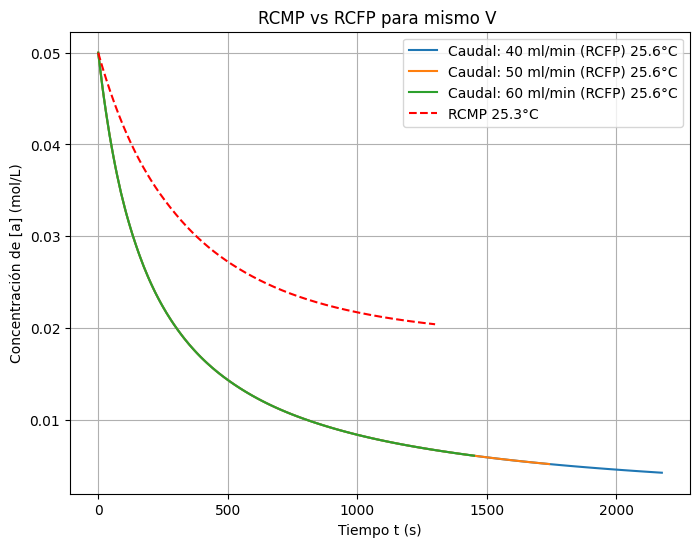

en un reactor flujo de piston al cambiar la velocidad de caudal, varia el tiempo de residencia y por tanto la conversion ,
se puede observar que al disminuir el caudal aumenta el tiempo de residencia y por tanto se agota mas la concentracion de a
El tiempo necesario para alcanzar una concentración de 0.023593 es de 3 min y 39.7s
frente a los 15 minutos del RCMP con ambos reactores del mismo volumen aunque con la ligera diferencia que el RCMP estaba a 25.3°C y el RCFP a 25.6°C


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pickle

# Parámetros iniciales
diametro = 5 / 1000  # Diámetro del tubo (m)
A_reactor = np.pi * (diametro / 2)**2  # Área de la sección transversal (m^2)
L = (1.45/1000)/A_reactor # Longitud del reactor (m)
# Cargar datos del RCMP desde archivo
with open('datos_serie_1.pkl', 'rb') as f:
    t_serie_1, a_t_serie_1 = pickle.load(f)

# Definir la ODE para el flujo pistón en función del tiempo
def odes(t, a):
    return -k * a**2

# Lista de medidas de caudales
medidas = [{'FA': [40]}, {'FA': [50]}, {'FA': [60]}]  # Caudales en ml/min

# Simular la concentración en función del tiempo para cada caudal
soluciones_tiempo_residencia = {}
tiempos_residencia = []  # Lista para almacenar los tiempos de residencia de cada serie
plt.figure(figsize=(8, 6))
for medida in medidas:
    caudal = medida['FA'][0]  # Caudal de cada serie (ml/min)
    caudal_m3_s = caudal / 60000000  # Convertir caudal a m³/s
    v = caudal_m3_s / A_reactor  # Velocidad en el reactor (m/s)
    tiempo_residencia = L / v  # Calcular el tiempo de residencia

    # Resolver la ODE en función del tiempo, limitado por el tiempo de residencia
    t_span = (0, tiempo_residencia)
    sol_tiempo = solve_ivp(odes, t_span, [a0], method='RK45', dense_output=True)
    t_eval = np.linspace(0, tiempo_residencia, 100)
    concentracion_tiempo = sol_tiempo.sol(t_eval)[0]  # Guardar concentración para cada caudal
    plt.plot(t_eval, concentracion_tiempo, label=f'Caudal: {caudal} ml/min (RCFP) 25.6°C')

# Graficar resultados y comparar con el RCMP

plt.plot(t_serie_1, a_t_serie_1, label='RCMP 25.3°C', linestyle='--', color='red')
plt.xlabel('Tiempo t (s)')
plt.ylabel('Concentración de [a] (mol/L)')
plt.title('RCMP vs RCFP para mismo V ')
plt.legend()
plt.grid()
plt.show()
print(f"""en un reactor flujo de piston al cambiar la velocidad de caudal, varia el tiempo de residencia y por tanto la conversion ,
se puede observar que al disminuir el caudal aumenta el tiempo de residencia y por tanto se agota mas la concentracion de a""")
valor_objetivo = 0.023593
indice = np.abs(concentracion_tiempo - valor_objetivo).argmin()
tiempo_objetivo = t_eval[indice]
tiempo_min = int(np.floor(tiempo_objetivo / 60))
tiempo_seg = np.round(tiempo_objetivo % 60,2)
print(f'''El tiempo necesario para alcanzar una concentración de {valor_objetivo} es de {tiempo_min} min y {tiempo_seg}s
frente a los 15 minutos del RCMP con ambos reactores del mismo volumen aunque con la ligera diferencia que el RCMP estaba a 25.3°C y el RCFP a 25.6°C''')